In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [52]:
dataset = pd.read_csv("/content/sample_data/california_housing_train.csv")
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [53]:
dataset.shape

(17000, 9)

In [54]:
dataset.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0


In [55]:
dataset.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<Axes: >

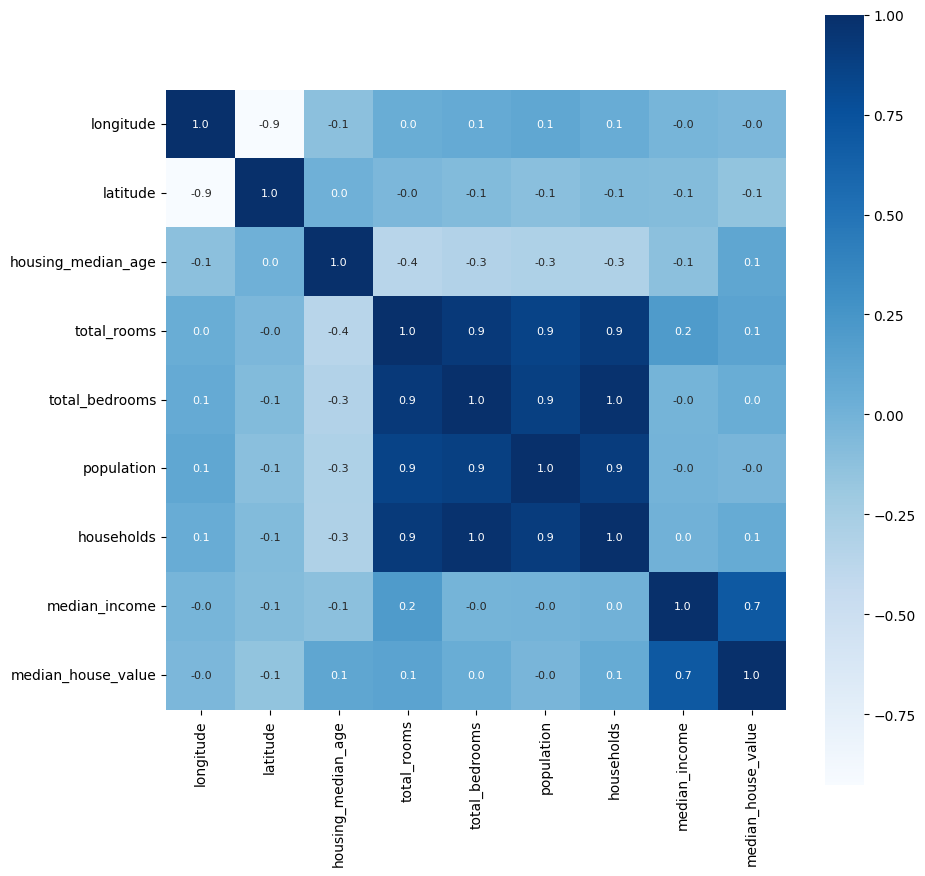

In [56]:
correlation = dataset.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')


In [57]:
x= dataset.drop(["median_house_value"], axis =1)
x.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250


In [58]:
y= dataset["median_house_value"]
y.head()

,median_house_value
0,66900.0
1,80100.0
2,85700.0
3,73400.0
4,65500.0


In [59]:
scalar = StandardScaler()
scalar.fit(x)
standardized_data = scalar.transform(x)
print(standardized_data)

[[ 2.619365   -0.67152023 -1.07967114 ... -0.36118401 -0.07599796
  -1.25254316]
 [ 2.53956878 -0.57326437 -0.76187201 ... -0.26186523 -0.09940441
  -1.08148298]
 [ 2.4946834  -0.90546278 -0.92077158 ... -0.95535424 -0.99925206
  -1.17010515]
 ...
 [-2.36291168  2.90780067 -0.92077158 ... -0.16167524 -0.11760942
  -0.44666313]
 [-2.36291168  2.88908527 -0.76187201 ... -0.1146295  -0.06039367
  -0.99778717]
 [-2.387848    2.29955006  1.85997083 ... -0.54326844 -0.60134255
  -0.45536288]]


In [60]:
 X = standardized_data
 Y = dataset['median_house_value']

In [61]:
x_train, x_test, y_train,y_test = train_test_split(X,Y,train_size=0.2,random_state = 42)

In [62]:
print(x.shape,x_train.shape,x_test.shape)

(17000, 8) (3400, 8) (13600, 8)


In [63]:
model =XGBRegressor()
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [64]:
train_data_predction = model.predict(x_train)
print(train_data_predction)

[202481.2  486631.2  506885.78 ... 141632.45 144868.06 230273.05]


In regression we have some type of errors like, R-square error and Mean Absolute error etc

In [65]:
# R squared error
error_1 = metrics.r2_score(y_train,train_data_predction)
print("R squared error : ",error_1)
error_2 = metrics.mean_absolute_error(y_train,train_data_predction)
print("Mean Absolute error : ",error_2)

R squared error :  0.9866417435982812
Mean Absolute error :  9550.232278262867


In [66]:
test_data_predction = model.predict(x_test)
print(test_data_predction)

[136725.94 457791.62  76737.6  ...  48735.5   76802.79 137553.58]


In [69]:
#  R squared error
error_3 = metrics.r2_score(y_test,test_data_predction)
print("R squared error : ",error_3)
error_4 = metrics.mean_absolute_error(y_test,test_data_predction)
print("Mean Absolute error : ",error_4)

R squared error :  0.7852814478190374
Mean Absolute error :  36655.810669304345


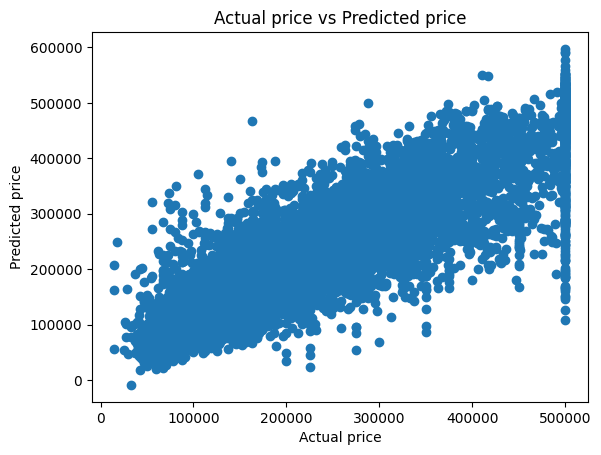

In [70]:
plt.scatter(y_test,test_data_predction)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual price vs Predicted price")
plt.show()